In [1]:
from scipy.special import expit
from rbm import RBM
from sampler import VanillaSampler, PartitionedSampler, ApproximatedSampler, LayerWiseApproxSampler,ApproximatedMulDimSampler
from trainer import VanillaTrainier, ORBMTrainer
from performance import Result
import numpy as np
import datasets, performance, plotter, mnist, pickle, rbm, os, logging, sampler,math
from sklearn.linear_model import Perceptron
from sklearn.neural_network import BernoulliRBM
import plotter as pp
from numpy import newaxis
from datasets import SquareToyData
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

logger = logging.getLogger()
# Set the logging level to logging.DEBUG 
logger.setLevel(logging.INFO)

%matplotlib inline

In [2]:
def key_for_visible(v):
    return "{}".format(v)

def goodnight(model, sampler, hours_of_sleep, num_gibbs_per_hour):
    """Generate a dictionary of reconstructions to the number of times they occurred"""
    result_dict = Counter()
    v_prime = sampler.dream(model, num_gibbs_per_hour)
    reconstruction_dict = {} # the actual reconstructions that occurred
    for i in range(hours_of_sleep):
        v_prime = sampler.dream(model, num_gibbs_per_hour)
        result_dict[key_for_visible(v_prime)] += 1
        reconstruction_dict[key_for_visible(v_prime)] = v_prime
    return result_dict, reconstruction_dict

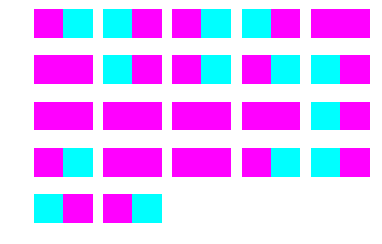

In [3]:
square_factory = SquareToyData()
sq_shape = (1,1)
img_size = (1,2)
dataset_one = square_factory.gen_training(sq_shape, img_size)
dataset_two = np.copy(dataset_one)

np.random.shuffle(dataset_one)
np.random.shuffle(dataset_two)

dataset_composite = np.maximum(dataset_one, dataset_two)
for i in range(10):
    np.random.shuffle(dataset_one)
    np.random.shuffle(dataset_two)

    dataset_composite = np.append(dataset_composite,np.maximum(dataset_one , dataset_two), axis=0)

np.append(dataset_composite,dataset_one[:5],axis= 0)
pp.images(dataset_composite, color_range=(0,1))

In [4]:
print("Dataset of {1} by {2} with {0} items".format(*dataset_composite.shape))

Dataset of 1 by 2 with 22 items


In [5]:
(num_items, num_vis ) = datasets.squash_images(dataset_composite).shape
num_hid = 2

In [6]:
rbm_a = RBM(num_hid, num_vis,num_items)
rbm_b = RBM(num_hid, num_vis,num_items)
sampler = ApproximatedMulDimSampler(rbm_a.weights ,rbm_b.weights, rbm_a.hidden_bias, rbm_b.hidden_bias)
trainer = ORBMTrainer(rbm_a,rbm_b, sampler)

In [7]:
trainer.train(int(1e2),datasets.squash_images(dataset_composite), logging_freq=10)

INFO:trainer:Created Progress logger for task - trainer
INFO:trainer:0.0% complete
INFO:trainer:10.0% complete
INFO:trainer:20.0% complete
INFO:trainer:30.0% complete
INFO:trainer:40.0% complete
INFO:trainer:50.0% complete
INFO:trainer:60.0% complete
INFO:trainer:70.0% complete
INFO:trainer:80.0% complete
INFO:trainer:90.0% complete
INFO:trainer:100% complete


In [8]:
pp.images(rbm.weights_into_hiddens(rbm_a.weights), title="Hinton Diagram", cmap="gray")
pp.images(rbm.weights_into_hiddens(rbm_b.weights), title="Hinton Diagram", cmap="gray")

ValueError: total size of new array must be unchanged

INFO:root:Ground Truth


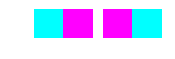

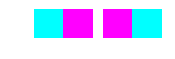

INFO:root:A


ValueError: total size of new array must be unchanged

In [9]:
sampler_a = VanillaSampler(rbm_a)
sampler_b = VanillaSampler(rbm_b)

logging.info("Ground Truth")
pp.images(dataset_one)
pp.images(dataset_two)

logging.info("A")
pp.images(datasets.inflate_images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_one))))
pp.images(datasets.inflate_images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_two))))
logging.info("B")
pp.images(datasets.inflate_images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_one))))
pp.images(datasets.inflate_images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_two))))

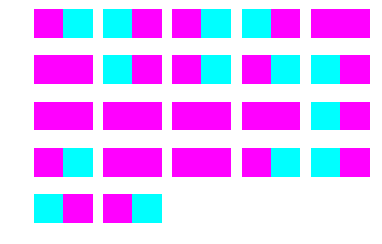

In [10]:
pp.images(dataset_composite, color_range=(0,1))

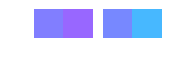

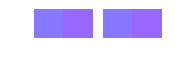

In [11]:
pp.images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_one), return_sigmoid=True).reshape(2,1,2), color_range=(0,1))
pp.images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_two), return_sigmoid=True).reshape(2,1,2), color_range=(0,1))

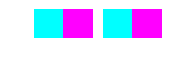

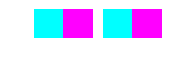

In [12]:
pp.images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_one), return_sigmoid=True).reshape(2,1,2))
pp.images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_two), return_sigmoid=True).reshape(2,1,2))

In [13]:
rbm_a.weights
rbm_b.weights
rbm_a.hidden_bias
rbm_b.hidden_bias

array([ 0.04796162, -0.14261524])

In [14]:
sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_one), return_sigmoid=True)

array([[ 0.50488631,  0.59620688],
       [ 0.46661596,  0.27784298]])

In [15]:
rbm_c = RBM(num_hid, num_vis, num_items)
sampler_c = VanillaSampler(rbm_c)
trainer_c = VanillaTrainier(rbm_c,sampler_c)
trainer.train(int(1e2), datasets.squash_images(dataset_composite))

INFO:trainer:0.0% complete
INFO:trainer:10.0% complete
INFO:trainer:20.0% complete
INFO:trainer:30.0% complete
INFO:trainer:40.0% complete
INFO:trainer:50.0% complete
INFO:trainer:60.0% complete
INFO:trainer:70.0% complete
INFO:trainer:80.0% complete
INFO:trainer:90.0% complete
INFO:trainer:100% complete


In [16]:
sampler_c.reconstruction_given_visible(datasets.squash_images(dataset_one), return_sigmoid=True)

array([[ 0.4698919 ,  0.75684728],
       [ 0.59268673,  0.29524824]])

In [17]:
dataset_one

array([[[ 0.,  1.]],

       [[ 1.,  0.]]])

In [ ]:
a,b = goodnight(rbm_a, sampler_c, 10000, 1000)

In [ ]:
pp.plot_dict(a)